##### GradientBoosting is great algorithm since it uses same algorithm steps for both regression and classification.

##### The only difference between classification and regression problem is that gradient boosting uses different loss func for regression and for classification.Also in regression prblems, we take first model as mean of target column whereas in graidnet boosting classification we take first model as log(odds) i.e log(no of times 1 came/no of times 0 came).

In [10]:
import pandas as pd
import numpy as np
import random

df = pd.DataFrame(
                  [
                      [6.82, 118, 0],
                      [6.36, 125, 1],
                      [5.39, 99, 1],
                      [5.50, 106, 1],
                      [6.39, 148, 0],
                      [9.13, 148, 1],
                      [7.17, 147, 1],
                      [7.72, 72, 0]
                   ], columns = ['cgpa',	'iq',	'is_placed']
)

df

,cgpa,iq,is_placed
0,6.82,118,0
1,6.36,125,1
2,5.39,99,1
3,5.50,106,1
4,6.39,148,0
5,9.13,148,1
6,7.17,147,1
7,7.72,72,0


In [11]:
# initial prediction
#First model i.e log(odds)

df['pre1(log-odds)'] = np.log(5/3)
df

,cgpa,iq,is_placed,pre1(log-odds)
0,6.82,118,0,0.510826
1,6.36,125,1,0.510826
2,5.39,99,1,0.510826
3,5.50,106,1,0.510826
4,6.39,148,0,0.510826
5,9.13,148,1,0.510826
6,7.17,147,1,0.510826
7,7.72,72,0,0.510826


##### For calculating the residuals ,we will need the probability of outcome which we can calculate by taking formula p=1/e+e^-log(odds).

In [12]:
# convert log odds to probability
df['pre1(probability)'] = 1/(1+np.exp(-np.log(5/3)))
df

,cgpa,iq,is_placed,pre1(log-odds),pre1(probability)
0,6.82,118,0,0.510826,0.625
1,6.36,125,1,0.510826,0.625
2,5.39,99,1,0.510826,0.625
3,5.50,106,1,0.510826,0.625
4,6.39,148,0,0.510826,0.625
5,9.13,148,1,0.510826,0.625
6,7.17,147,1,0.510826,0.625
7,7.72,72,0,0.510826,0.625


##### Now ,we need to calculate the residuals so that we evaluate the erros made by model 1 and pass it on to 2 model.Residual has formula y-predicted value by model ..i.e for our model it will be is placed-pre1(probability).

In [13]:
# convert log odds to probability
df['res1'] =df['is_placed']- df['pre1(probability)']
df

,cgpa,iq,is_placed,pre1(log-odds),pre1(probability),res1
0,6.82,118,0,0.510826,0.625,-0.625
1,6.36,125,1,0.510826,0.625,0.375
2,5.39,99,1,0.510826,0.625,0.375
3,5.50,106,1,0.510826,0.625,0.375
4,6.39,148,0,0.510826,0.625,-0.625
5,9.13,148,1,0.510826,0.625,0.375
6,7.17,147,1,0.510826,0.625,0.375
7,7.72,72,0,0.510826,0.625,-0.625


##### Training second model i.e decisiontreeRegressor coz we will train it on res column which is numerical. . It will have inputs as cgpa and iq but it will have output column as res1.

In [14]:
from sklearn.tree import DecisionTreeRegressor

reg1 = DecisionTreeRegressor(max_leaf_nodes=3, random_state=1)

reg1.fit(df.iloc[:,0:2].values, df.iloc[:,-1].values)

DecisionTreeRegressor(max_leaf_nodes=3, random_state=1)

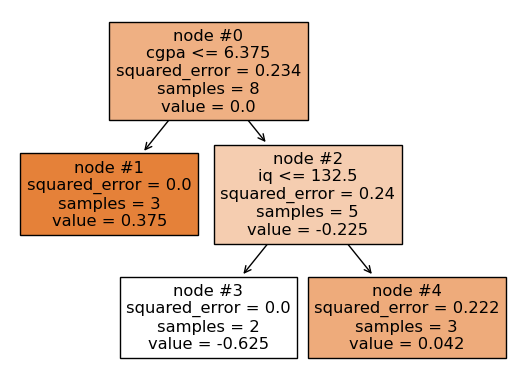

In [15]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plot_tree(reg1, feature_names=['cgpa','iq'],filled=True, node_ids=True)
plt.show()

##### Now, we identify which rows are categorized in which node of decision tree.

In [16]:
df['leaf_entry1'] = reg1.apply(df.iloc[:,0:2])
df

C:\Users\bagwe\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


,cgpa,iq,is_placed,pre1(log-odds),pre1(probability),res1,leaf_entry1
0,6.82,118,0,0.510826,0.625,-0.625,3
1,6.36,125,1,0.510826,0.625,0.375,1
2,5.39,99,1,0.510826,0.625,0.375,1
3,5.50,106,1,0.510826,0.625,0.375,1
4,6.39,148,0,0.510826,0.625,-0.625,4
5,9.13,148,1,0.510826,0.625,0.375,4
6,7.17,147,1,0.510826,0.625,0.375,4
7,7.72,72,0,0.510826,0.625,-0.625,3


##### Now ,we will calculate the log of odds value for each node.

In [17]:
def return_logs(leaf):
    temp_df = df[df['leaf_entry1'] == leaf]
    num = temp_df['res1'].sum()

    den = sum(temp_df['pre1(probability)'] * (1 - temp_df['pre1(probability)']))
    return round(num/den,2)

In [18]:
df['pre2(log-odds)'] = df['pre1(log-odds)'] + df['leaf_entry1'].apply(return_logs)

In [19]:
df

,cgpa,iq,is_placed,pre1(log-odds),pre1(probability),res1,leaf_entry1,pre2(log-odds)
0,6.82,118,0,0.510826,0.625,-0.625,3,-2.159174
1,6.36,125,1,0.510826,0.625,0.375,1,2.110826
2,5.39,99,1,0.510826,0.625,0.375,1,2.110826
3,5.50,106,1,0.510826,0.625,0.375,1,2.110826
4,6.39,148,0,0.510826,0.625,-0.625,4,0.690826
5,9.13,148,1,0.510826,0.625,0.375,4,0.690826
6,7.17,147,1,0.510826,0.625,0.375,4,0.690826
7,7.72,72,0,0.510826,0.625,-0.625,3,-2.159174


In [20]:
df['pre2(probability)'] = 1/(1+np.exp(-df['pre2(log-odds)']))
df

,cgpa,iq,is_placed,pre1(log-odds),pre1(probability),res1,leaf_entry1,pre2(log-odds),pre2(probability)
0,6.82,118,0,0.510826,0.625,-0.625,3,-2.159174,0.103477
1,6.36,125,1,0.510826,0.625,0.375,1,2.110826,0.891951
2,5.39,99,1,0.510826,0.625,0.375,1,2.110826,0.891951
3,5.50,106,1,0.510826,0.625,0.375,1,2.110826,0.891951
4,6.39,148,0,0.510826,0.625,-0.625,4,0.690826,0.666151
5,9.13,148,1,0.510826,0.625,0.375,4,0.690826,0.666151
6,7.17,147,1,0.510826,0.625,0.375,4,0.690826,0.666151
7,7.72,72,0,0.510826,0.625,-0.625,3,-2.159174,0.103477


In [21]:
df['res2'] = df['is_placed'] - df['pre2(probability)']
df

,cgpa,iq,is_placed,pre1(log-odds),pre1(probability),res1,leaf_entry1,pre2(log-odds),pre2(probability),res2
0,6.82,118,0,0.510826,0.625,-0.625,3,-2.159174,0.103477,-0.103477
1,6.36,125,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049
2,5.39,99,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049
3,5.50,106,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049
4,6.39,148,0,0.510826,0.625,-0.625,4,0.690826,0.666151,-0.666151
5,9.13,148,1,0.510826,0.625,0.375,4,0.690826,0.666151,0.333849
6,7.17,147,1,0.510826,0.625,0.375,4,0.690826,0.666151,0.333849
7,7.72,72,0,0.510826,0.625,-0.625,3,-2.159174,0.103477,-0.103477


##### Training 3rd model.

In [22]:
reg2 = DecisionTreeRegressor(max_leaf_nodes=3, random_state=1)

reg2.fit(df.iloc[:,0:2].values, df.iloc[:,-1].values)

DecisionTreeRegressor(max_leaf_nodes=3, random_state=1)

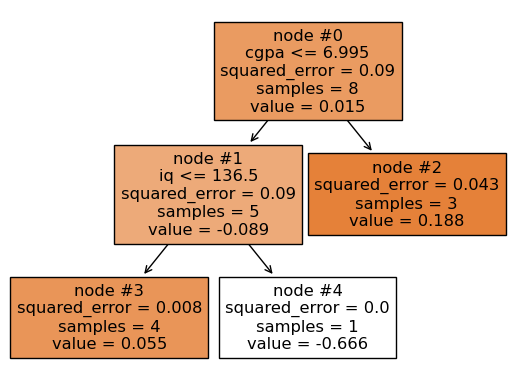

In [23]:
plot_tree(reg2, feature_names=['cgpa','iq'],filled=True, node_ids=True)
plt.show()

##### Repeating same steps for model 2.

In [24]:
df['leaf_entry2'] = reg2.apply(df.iloc[:,0:2])
df

C:\Users\bagwe\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


,cgpa,iq,is_placed,pre1(log-odds),pre1(probability),res1,leaf_entry1,pre2(log-odds),pre2(probability),res2,leaf_entry2
0,6.82,118,0,0.510826,0.625,-0.625,3,-2.159174,0.103477,-0.103477,3
1,6.36,125,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049,3
2,5.39,99,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049,3
3,5.50,106,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049,3
4,6.39,148,0,0.510826,0.625,-0.625,4,0.690826,0.666151,-0.666151,4
5,9.13,148,1,0.510826,0.625,0.375,4,0.690826,0.666151,0.333849,2
6,7.17,147,1,0.510826,0.625,0.375,4,0.690826,0.666151,0.333849,2
7,7.72,72,0,0.510826,0.625,-0.625,3,-2.159174,0.103477,-0.103477,2


In [25]:
def return_logs(leaf):
    num = df[df['leaf_entry2'] == leaf]['res2'].sum()
    den = sum(df[df['leaf_entry2'] == leaf]['pre2(probability)'] * (1 - df[df['leaf_entry2'] == leaf]['pre2(probability)']))
    return round(num/den,2)

In [26]:
df['pre3(log-odds)'] = df['pre1(log-odds)'] + df['pre2(log-odds)'] + df['leaf_entry2'].apply(return_logs)

In [27]:
df['pre3(probability)'] = 1/(1+np.exp(-df['pre3(log-odds)']))
df

,cgpa,iq,is_placed,pre1(log-odds),pre1(probability),res1,leaf_entry1,pre2(log-odds),pre2(probability),res2,leaf_entry2,pre3(log-odds),pre3(probability)
0,6.82,118,0,0.510826,0.625,-0.625,3,-2.159174,0.103477,-0.103477,3,-1.068349,0.255717
1,6.36,125,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049,3,3.201651,0.960896
2,5.39,99,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049,3,3.201651,0.960896
3,5.50,106,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049,3,3.201651,0.960896
4,6.39,148,0,0.510826,0.625,-0.625,4,0.690826,0.666151,-0.666151,4,-1.798349,0.142052
5,9.13,148,1,0.510826,0.625,0.375,4,0.690826,0.666151,0.333849,2,2.251651,0.904793
6,7.17,147,1,0.510826,0.625,0.375,4,0.690826,0.666151,0.333849,2,2.251651,0.904793
7,7.72,72,0,0.510826,0.625,-0.625,3,-2.159174,0.103477,-0.103477,2,-0.598349,0.354722


In [28]:
df['res_final'] = df['is_placed'] - df['pre3(probability)']

df[['res1','res2','res_final']]

,res1,res2,res_final
0,-0.625,-0.103477,-0.255717
1,0.375,0.108049,0.039104
2,0.375,0.108049,0.039104
3,0.375,0.108049,0.039104
4,-0.625,-0.666151,-0.142052
5,0.375,0.333849,0.095207
6,0.375,0.333849,0.095207
7,-0.625,-0.103477,-0.354722
